In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('datasets/insurance.csv')
print(df.describe())
print(df.info())

df_numeric = df[['age','bmi','children','charges']]
df_categoric = df[['sex','smoker','region']]

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: floa

In [37]:
print(df_numeric.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [38]:
print(df_categoric.value_counts())
df_categoric_dummies = pd.get_dummies(df_categoric)

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
Name: count, dtype: int64


In [39]:
print(df.pivot_table(values='bmi', index='sex', columns='smoker', aggfunc='count'))
print(df.pivot_table(values='bmi', index='sex', columns='region', aggfunc='count'))
print(df.pivot_table(values='bmi', index='smoker', columns='region', aggfunc='count'))

smoker   no  yes
sex             
female  547  115
male    517  159
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


In [40]:
print(df_categoric_dummies.corr())
# we conclude that the data are very balanced: no significant correlation between cathegorical features

                  sex_female  sex_male  smoker_no  smoker_yes   
sex_female          1.000000 -1.000000   0.076185   -0.076185  \
sex_male           -1.000000  1.000000  -0.076185    0.076185   
smoker_no           0.076185 -0.076185   1.000000   -1.000000   
smoker_yes         -0.076185  0.076185  -1.000000    1.000000   
region_northeast    0.002425 -0.002425  -0.002811    0.002811   
region_northwest    0.011156 -0.011156   0.036945   -0.036945   
region_southeast   -0.017117  0.017117  -0.068498    0.068498   
region_southwest    0.004184 -0.004184   0.036945   -0.036945   

                  region_northeast  region_northwest  region_southeast   
sex_female                0.002425          0.011156         -0.017117  \
sex_male                 -0.002425         -0.011156          0.017117   
smoker_no                -0.002811          0.036945         -0.068498   
smoker_yes                0.002811         -0.036945          0.068498   
region_northeast          1.000000         -

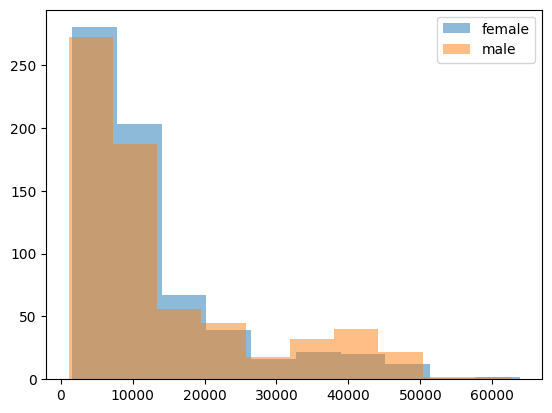

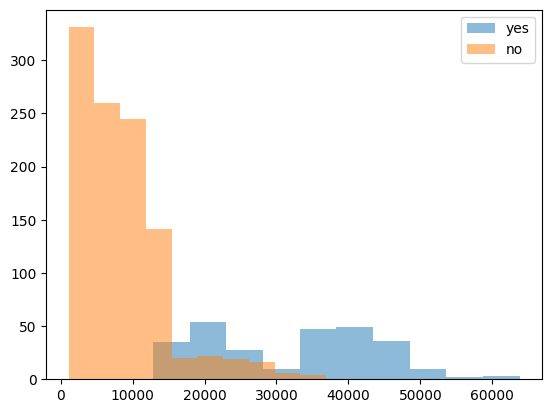

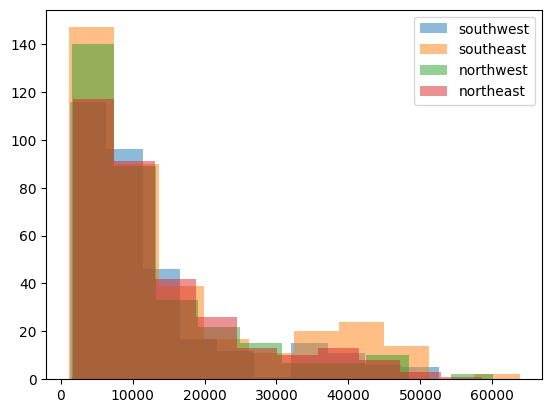

In [41]:
for feat in df_categoric.columns:

    levels = df[feat].unique()

    for l in levels:
        plt.hist(df[df[feat]==l]['charges'], alpha=0.5, label=l)
    plt.legend()
    plt.show()

In [42]:
df_regressor = df.copy()
# feature importanti da aggiungere:

df_regressor['bmi_m'] = df_categoric_dummies['sex_male']*df['bmi']
df_regressor['bmi_f'] = df_categoric_dummies['sex_female']*df['bmi']
# the bmi has different implications for males and females
df_regressor = df_regressor.drop('bmi', axis=1)

df_regressor['age_smoke'] = df_categoric_dummies['smoker_yes']*df['age']
df_regressor['age_nosmoke'] = df_categoric_dummies['smoker_no']*df['age']
# smoking is differently bad at different ages
df_regressor = df_regressor.drop('age', axis=1)

df_regressor['smoke_sex'] = df['smoker'] + '_' + df['sex']

print(df_regressor.describe())
print(df_regressor.info())

          children       charges        bmi_m        bmi_f    age_smoke   
count  1338.000000   1338.000000  1338.000000  1338.000000  1338.000000  \
mean      1.094918  13270.422265    15.633449    15.029948     7.887145   
std       1.205493  12110.011237    16.079735    15.777241    16.772800   
min       0.000000   1121.873900     0.000000     0.000000     0.000000   
25%       0.000000   4740.287150     0.000000     0.000000     0.000000   
50%       1.000000   9382.033000    18.097500     0.000000     0.000000   
75%       2.000000  16639.912515    30.795000    29.925000     0.000000   
max       5.000000  63770.428010    53.130000    48.070000    64.000000   

       age_nosmoke  
count  1338.000000  
mean     31.319880  
std      20.260626  
min       0.000000  
25%      19.000000  
50%      33.000000  
75%      49.000000  
max      64.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null C

We start learning

In [43]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X_encoded = pd.get_dummies(df_regressor).drop('charges', axis=1)
y = df_regressor['charges']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.9)

In [45]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('RMSE is '+str(mse**0.5))

r2 = r2_score(y_test, y_pred)

print('R2 score is '+str(r2))

RMSE is 6142.097406053794
R2 score is 0.6137095348431238


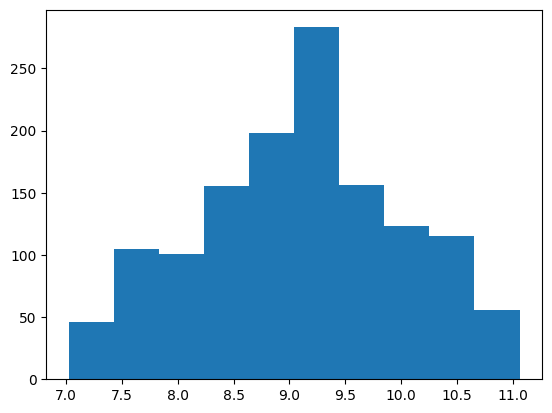

In [46]:
# try make a transformation of the data to make the response look more gaussian
plt.hist(np.log(y))
plt.show()

# this loowks much closer to a gaussian

In [ ]:
log_y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, log_y, train_size=0.9)

model_logy = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_logy.fit(X_train, y_train)

y_pred = model_logy.predict(X_test)
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))

print('RMSE is '+str(mse**0.5))

r2 = r2_score(np.exp(y_test), np.exp(y_pred))

print('R2 score is '+str(r2))

# using this transformation does not improve the MSE -> keep y as it is

RMSE is 5742.960849395815
R2 score is 0.7491729395098632


In [48]:
# try more advanced models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.9)

max_depths = [2, 3, 4, 6, 9, 12, 15]
cv_scores_rf = []
for m in max_depths:
    rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=m)
    cv_scores_rf.append(np.mean(cross_val_score(rf, X_train, y_train, cv = 5)))


final_depth_rf = max_depths[np.argmax(cv_scores_rf)]
print(final_depth_rf)
# parameter to use for random forest

max_depths = [2, 3, 4, 6, 9, 12, 15, 20, 25]
cv_scores_xgboost = []
for m in max_depths:
    xgboost = xgb.XGBRegressor(tree_method="hist", max_depth=m, eval_metric='rmse')
    cv_scores_xgboost.append(np.mean(cross_val_score(xgboost, X_train, y_train, cv = 5)))


final_depth_xgboost = max_depths[np.argmax(cv_scores_xgboost)]
print(final_depth_xgboost)

# parameter to use for xg boost

4
2


In [54]:
rf_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=final_depth_rf)
xgboost_model = xgb.XGBRegressor(tree_method="hist", max_depth=final_depth_xgboost, eval_metric='rmse')

rf_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('RMSE for Random forest is '+str(mse_rf**0.5))

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
print('RMSE for XGBoost is '+str(mse_xgboost**0.5))

RMSE for Random forest is 3961.2519053846836
RMSE for XGBoost is 3928.1027611028135


In [55]:
final_results = {'Lin_reg': mse**0.5, 'rf': mse_rf**0.5, 'xgboost': mse_xgboost**0.5}
print(final_results)

{'Lin_reg': 5742.960849395815, 'rf': 3961.2519053846836, 'xgboost': 3928.1027611028135}


In [56]:
rf_importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

print(rf_importance)

age_smoke               0.269979
age_nosmoke             0.222654
smoker_yes              0.171487
smoker_no               0.156422
bmi_f                   0.095533
bmi_m                   0.073899
children                0.008639
region_northeast        0.001015
region_northwest        0.000154
region_southeast        0.000131
region_southwest        0.000086
sex_male                0.000000
sex_female              0.000000
smoke_sex_no_female     0.000000
smoke_sex_no_male       0.000000
smoke_sex_yes_female    0.000000
smoke_sex_yes_male      0.000000
dtype: float64
